In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("Weather Data.csv")

In [5]:
df.sample(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
4678,7/13/2012 22:00,26.6,16.4,54,9,25.0,101.37,Clear
2314,4/6/2012 10:00,3.9,-7.9,42,6,48.3,101.35,Mainly Clear
3477,5/24/2012 21:00,22.4,15.9,67,19,25.0,101.31,Clear
7076,10/21/2012 20:00,11.4,5.5,67,20,25.0,100.63,Mostly Cloudy
6493,9/27/2012 13:00,13.6,4.5,54,11,48.3,101.99,Mostly Cloudy
8388,12/15/2012 12:00,-9.1,-15.1,62,19,48.3,102.71,Mainly Clear
4305,6/28/2012 9:00,20.4,14.1,67,11,48.3,100.27,Mostly Cloudy
379,1/16/2012 19:00,-14.8,-19.1,70,15,25.0,101.23,Mainly Clear
7842,11/22/2012 18:00,6.9,0.5,64,15,25.0,101.34,Mainly Clear
2650,4/20/2012 10:00,6.6,1.6,70,24,24.1,101.07,Rain


In [6]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [7]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Diccionario de datos 

- **Date/Time:** Esta columna indica la fecha y la hora en que se recopilaron los datos. Es una columna fundamental para el análisis de series temporales o el seguimiento de los cambios climáticos a lo largo del tiempo.
- **Temp_C:** Esta columna indica la temperatura en grados Celsius.
- **Dew Point** Temp_C: Esta columna indica la temperatura a la que el aire se satura de vapor de agua. Esta columna mide la temperatura del punto de rocío en grados Celsius. Se utiliza para evaluar la humedad y el potencial de condensación.
- **Rel Hum_%:** Esta columna indica la humedad relativa, que es la cantidad de vapor de agua en el aire en comparación con la cantidad máxima que el aire puede contener a una temperatura determinada.
- **Wind Speed_km/h:** Esta columna indica la velocidad del viento en kilómetros por hora.
- **Visibility_km:** Esta columna indica la distancia a la que se puede ver a simple vista.
- **Press_kPa:** Esta columna indica la presión atmosférica en kilopascales. Es un parámetro importante en el pronóstico del tiempo, ya que afecta los patrones climáticos y puede indicar próximos cambios climáticos.
- **Weather:** Esta columna indica el estado del tiempo.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


### **NOTA:** los datos estan en buena calidad puesto que no se necesita mucha limpieza 

In [9]:
weather= df['Weather'].unique()
for weathers in weather:
    print("->",weathers)

-> Fog
-> Freezing Drizzle,Fog
-> Mostly Cloudy
-> Cloudy
-> Rain
-> Rain Showers
-> Mainly Clear
-> Snow Showers
-> Snow
-> Clear
-> Freezing Rain,Fog
-> Freezing Rain
-> Freezing Drizzle
-> Rain,Snow
-> Moderate Snow
-> Freezing Drizzle,Snow
-> Freezing Rain,Snow Grains
-> Snow,Blowing Snow
-> Freezing Fog
-> Haze
-> Rain,Fog
-> Drizzle,Fog
-> Drizzle
-> Freezing Drizzle,Haze
-> Freezing Rain,Haze
-> Snow,Haze
-> Snow,Fog
-> Snow,Ice Pellets
-> Rain,Haze
-> Thunderstorms,Rain
-> Thunderstorms,Rain Showers
-> Thunderstorms,Heavy Rain Showers
-> Thunderstorms,Rain Showers,Fog
-> Thunderstorms
-> Thunderstorms,Rain,Fog
-> Thunderstorms,Moderate Rain Showers,Fog
-> Rain Showers,Fog
-> Rain Showers,Snow Showers
-> Snow Pellets
-> Rain,Snow,Fog
-> Moderate Rain,Fog
-> Freezing Rain,Ice Pellets,Fog
-> Drizzle,Ice Pellets,Fog
-> Drizzle,Snow
-> Rain,Ice Pellets
-> Drizzle,Snow,Fog
-> Rain,Snow Grains
-> Rain,Snow,Ice Pellets
-> Snow Showers,Fog
-> Moderate Snow,Blowing Snow


In [10]:
df.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [11]:
#valores unicos para la columna 
wind_speed = df['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 34


In [12]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [13]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [14]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [15]:
df.shape

(8784, 8)

In [16]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [17]:
df.duplicated().sum()

0

# Preprocesamiento

LabelEncoder es una clase que se utiliza para codificar características categóricas en valores numéricos. Esto es útil para muchos algoritmos de aprendizaje automático, ya que solo pueden aceptar valores numéricos como entrada.

In [18]:
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])

# Analisis exploratorio

- si la temperatura más frecuente es de 0 grados Celsius, la barra correspondiente a esta temperatura sería la más alta. Si la temperatura menos frecuente es de -10 grados Celsius, la barra correspondiente a esta temperatura sería la más baja.

- Este histograma podría ayudar a identificar la distribución de temperatura. Por ejemplo, si el histograma muestra que la temperatura se distribuye uniformemente entre los 10 y los 30 grados Celsius, se podría concluir que el clima es templado.

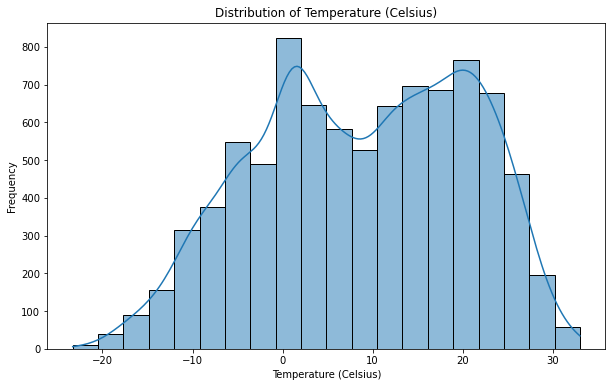

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Temp_C', bins=20, kde=True)
plt.title('Distribution of Temperature (Celsius)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

# Mapa de calor de correlación para columnas numéricas

- Un mapa de calor de correlación es una representación visual de la correlación entre dos variables. Las variables se representan en el eje X y el eje Y, y la intensidad del color de cada celda representa el grado de correlación entre las dos variables.
- puede ver cómo la temperatura ('Temp_C') se correlaciona con otras variables en el conjunto de datos. Por ejemplo:

    - La correlación positiva con 'Dew Point Temp_C' podría sugerir que a medida que aumenta la temperatura, la temperatura del punto de rocío también tiende a aumentar.     
    - Una correlación negativa con 'Rel Hum_%' podría indicar que a medida que aumenta la temperatura, la humedad relativa tiende a disminuir.
    
- Correlaciones de humedad: puede evaluar las relaciones entre variables relacionadas con la humedad:    
    - La correlación positiva entre 'Rel Hum_%' y 'Dew Point Temp_C' podría implicar que una humedad más alta corresponde a una temperatura de punto de rocío más alta.
    - La correlación negativa entre 'Rel Hum_%' y 'Temp_C' podría sugerir que a medida que aumenta la humedad, la temperatura tiende a disminuir.
    
- Viento y visibilidad : puede comprobar si 'wind speed km/h' o 'visibilidad km' tienen correlaciones significativas con la temperatura u otras variables. Por ejemplo, una correlación negativa entre 'wind speed km/h' y 'Temp_C' podría sugerir que los vientos más fuertes están asociados con temperaturas más frías.    

- Presión atmosférica: evaluar la relación entre 'Press_kPa' (presión atmosférica) y la temperatura. Generalmente, una presión más baja puede correlacionarse con temperaturas más cálidas y una presión más alta puede correlacionarse con temperaturas más frías.

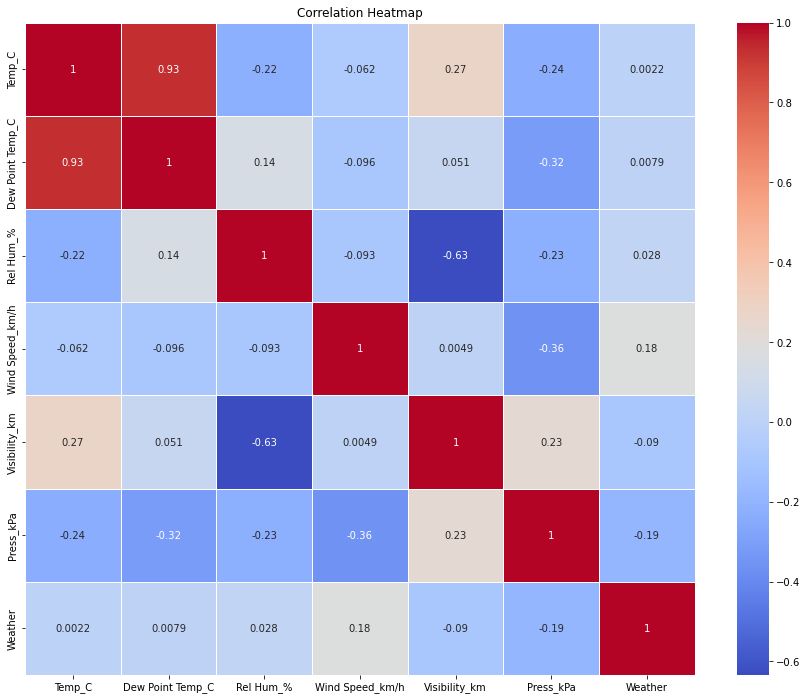

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 'Weather' vs. 'Temp_C'

- Un gráfico boxplot representa un resumen de los datos estadísticos de un conjunto de datos. Este gráfico muestra la distribución de los datos, incluyendo la mediana, los cuartiles, los valores mínimo y máximo, y los valores atípicos. Los elementos de un gráfico boxplot son los siguientes:
	- **La caja:** Representa el rango intercuartílico (IQR), que es la distancia entre el primer y el tercer cuartil. La mediana se encuentra en el centro de la caja
	- **Los bigotes:** Representan la dispersión de los datos fuera del IQR. Los bigotes se extienden hasta los datos más extremos que no se consideran valores atípicos.
	- **Los valores atípicos:** Son los datos que se encuentran fuera de los bigotes.
    
- un gráfico boxplot que compare la característica "Weather" y "Temperature (Celsius)" podría ayudar a identificar las diferencias en la distribución de la temperatura entre diferentes condiciones climáticas. Por ejemplo, si el gráfico muestra que la temperatura es más alta en días soleados que en días nublados, se podría concluir que el clima soleado es más cálido que el clima nublado.

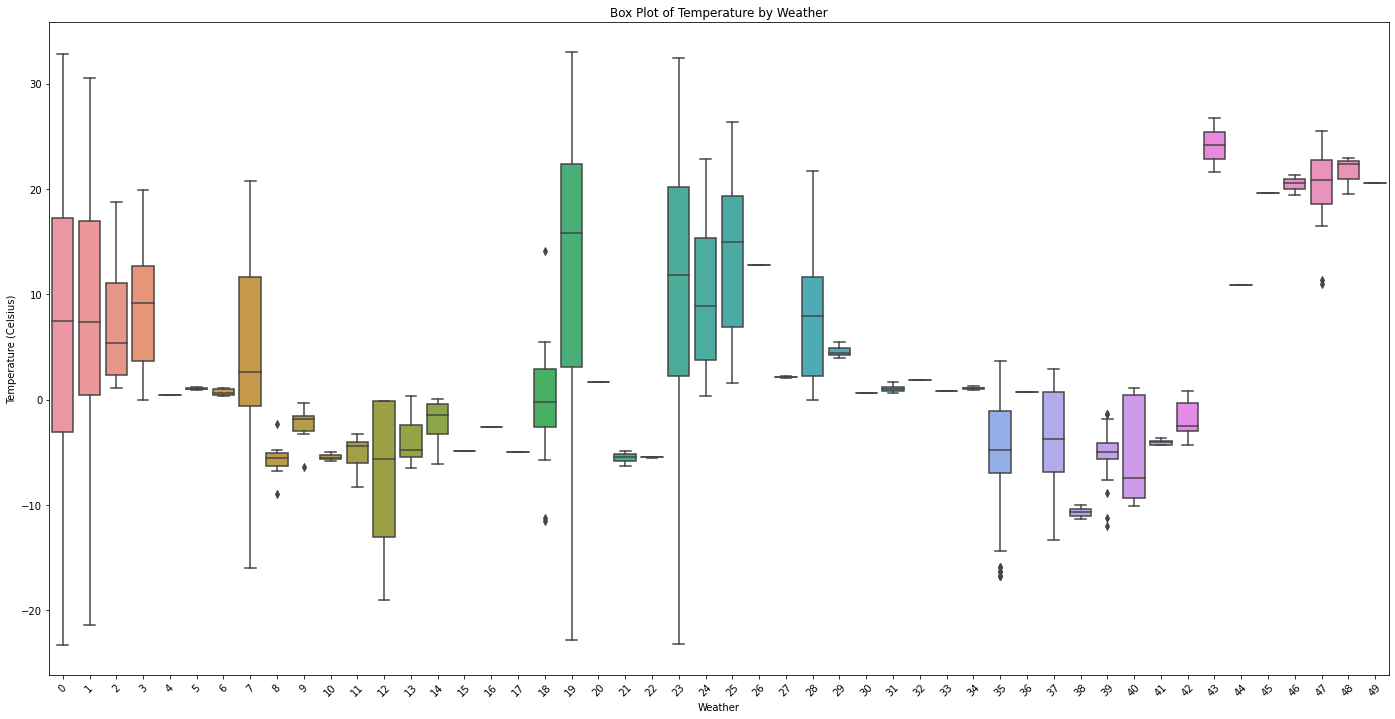

In [21]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=df, x='Weather', y='Temp_C')
plt.xticks(rotation=45)
plt.title('Box Plot of Temperature by Weather')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.show()

### se decodifican las caracteristicas categoricas con el fin de que el grafico se entienda un poco mejor 

In [22]:
# Crea un diccionario
dict_weather = {}

# Agrega los valores originales y codificados al diccionario
for i in range(len(le.classes_)):
    dict_weather[le.classes_[i]] = i

# Imprime el diccionario
dict_weather


{'Clear': 0,
 'Cloudy': 1,
 'Drizzle': 2,
 'Drizzle,Fog': 3,
 'Drizzle,Ice Pellets,Fog': 4,
 'Drizzle,Snow': 5,
 'Drizzle,Snow,Fog': 6,
 'Fog': 7,
 'Freezing Drizzle': 8,
 'Freezing Drizzle,Fog': 9,
 'Freezing Drizzle,Haze': 10,
 'Freezing Drizzle,Snow': 11,
 'Freezing Fog': 12,
 'Freezing Rain': 13,
 'Freezing Rain,Fog': 14,
 'Freezing Rain,Haze': 15,
 'Freezing Rain,Ice Pellets,Fog': 16,
 'Freezing Rain,Snow Grains': 17,
 'Haze': 18,
 'Mainly Clear': 19,
 'Moderate Rain,Fog': 20,
 'Moderate Snow': 21,
 'Moderate Snow,Blowing Snow': 22,
 'Mostly Cloudy': 23,
 'Rain': 24,
 'Rain Showers': 25,
 'Rain Showers,Fog': 26,
 'Rain Showers,Snow Showers': 27,
 'Rain,Fog': 28,
 'Rain,Haze': 29,
 'Rain,Ice Pellets': 30,
 'Rain,Snow': 31,
 'Rain,Snow Grains': 32,
 'Rain,Snow,Fog': 33,
 'Rain,Snow,Ice Pellets': 34,
 'Snow': 35,
 'Snow Pellets': 36,
 'Snow Showers': 37,
 'Snow Showers,Fog': 38,
 'Snow,Blowing Snow': 39,
 'Snow,Fog': 40,
 'Snow,Haze': 41,
 'Snow,Ice Pellets': 42,
 'Thunderstorms': 43

# Gráfico de pares para columnas numéricas

- Un diagrama de dispersión es una representación gráfica de la relación entre dos variables. Las variables se representan en el eje X y el eje Y, y los puntos de datos se trazan entre los dos ejes. Un diagrama de dispersión puede ayudar a identificar la siguiente información:
	- Correlación: La correlación es una medida de la relación entre dos variables. Si los puntos de datos se trazan en una línea recta, se dice que las variables están correlacionadas. La dirección de la correlación se puede determinar mirando la pendiente de la línea recta. Si la pendiente es positiva, las variables están correlacionadas positivamente. Si la pendiente es negativa, las variables están correlacionadas negativamente.
	- Distribución: La distribución de una variable se puede ver observando la dispersión de los puntos de datos en el eje Y. Si los puntos de datos están dispersos uniformemente, se dice que la variable tiene una distribución normal. Si los puntos de datos están dispersos en   un patrón, se dice que la variable tiene una distribución no normal.
	- Valores atípicos: Los valores atípicos son puntos de datos que se encuentran lejos del resto de los puntos de datos. Los valores atípicos se pueden identificar observando los puntos de datos que se encuentran fuera de los límites del diagrama de dispersión.

- Temperature vs. Dew Point Temperature:
	- Si los puntos se agrupan estrechamente alrededor de una línea que se inclina hacia arriba de izquierda a derecha, sugiere una correlación positiva. A medida que aumenta la temperatura, la temperatura del punto de rocío tiende a aumentar. 
    - Si los puntos se agrupan alrededor de una línea horizontal, no sugiere correlación.
- Temperature vs. Visibility:  
    - podría observar que las temperaturas más bajas están asociadas con una visibilidad reducida, posiblemente debido a la niebla o las precipitaciones.

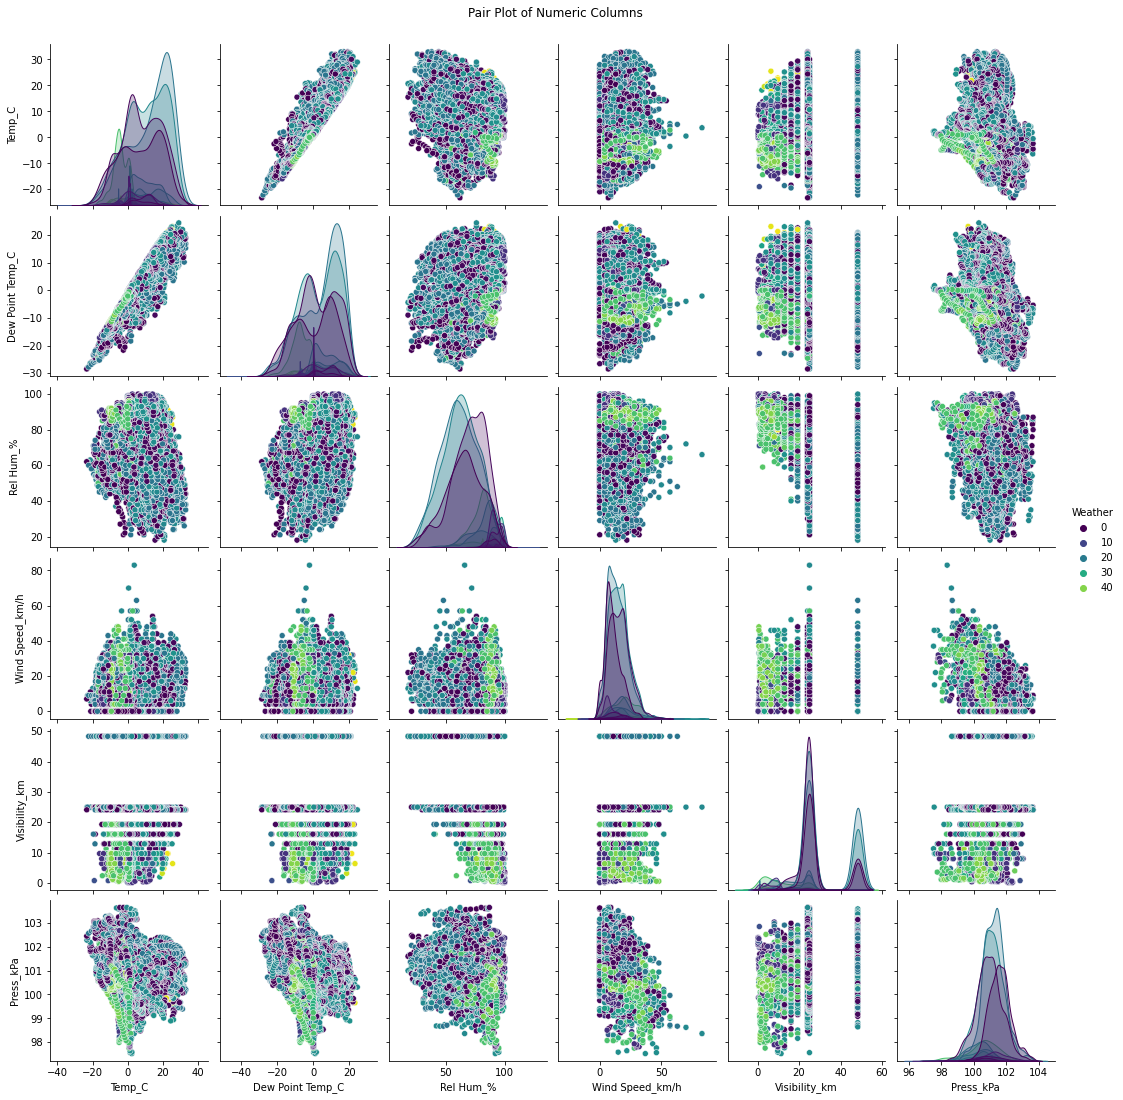

In [23]:
sns.pairplot(df[['Weather','Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']],hue='Weather',palette='viridis')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

# Análisis de series temporales

- El clima en el mes de julio es más cálido que en otros meses. Esto se debe a que la temperatura es un indicador del clima. un pico en el mes de julio y un valle en el mes de enero indica que el clima es cálido en el verano y frío en el invierno.
- Las series temporales son una herramienta útil para analizar la evolución de los datos a lo largo del tiempo. Pueden ayudar a identificar patrones, tendencias y anomalías.

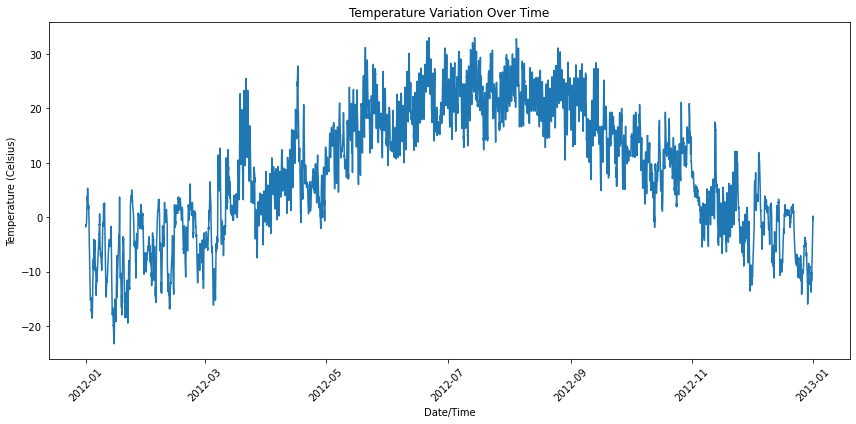

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date/Time', y='Temp_C')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clima

### El clima con mayor frecuencia es 'mayormente claro'

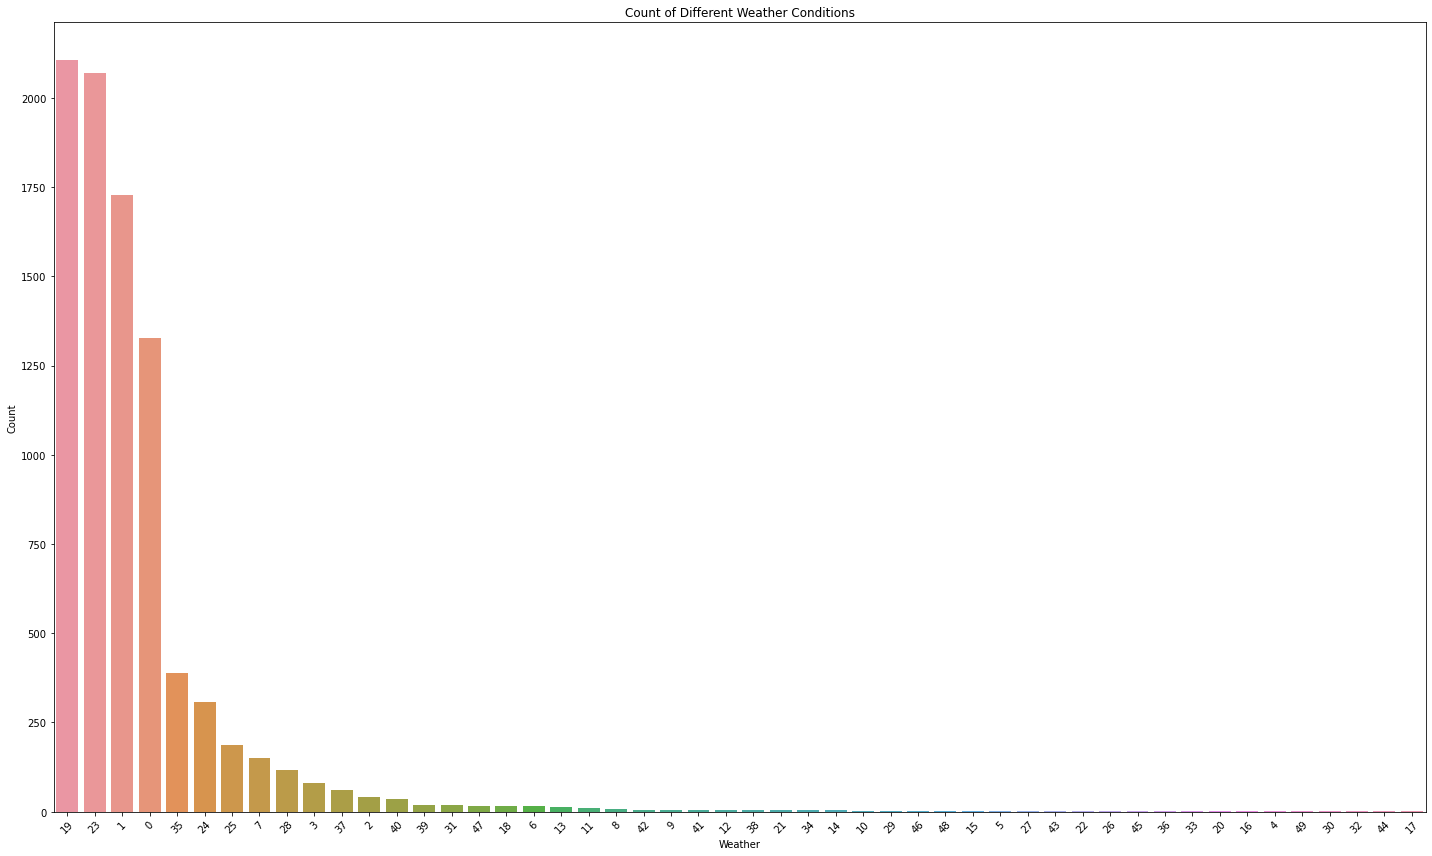

In [25]:
plt.figure(figsize=(20, 12))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title('Count of Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Variación de temperatura media mensual

In [26]:
df['Month'] = df['Date/Time'].dt.month
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()

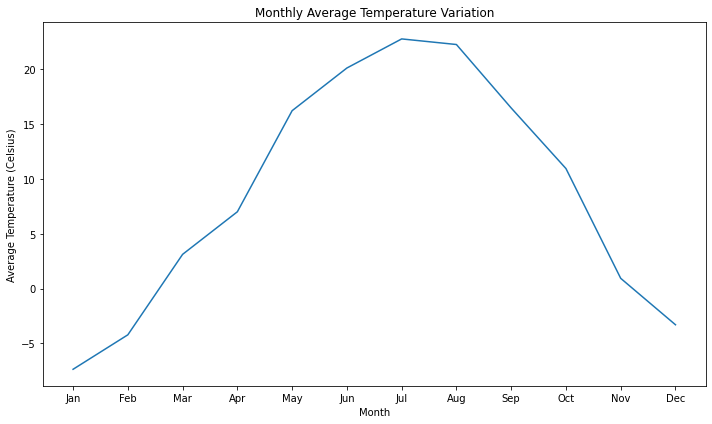

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title('Monthly Average Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Velocidad del viento frente a visibilidad

- Si el digrama muestra puntos de datos que crecen horizontalmente a lo largo de varios puntos en el eje Y, esto indica que hay poca o ninguna variación en 'Visibility_km' con cambios en 'Wind Speed_km/h'. En otras palabras, 'Visibility_km' permanece relativamente constante o no muestra un patrón claro en respuesta a los cambios en la velocidad del viento.
    - Condiciones climáticas específicas: En algunas condiciones climáticas, la visibilidad puede ser independiente de la velocidad del viento. Por ejemplo, la visibilidad puede ser alta en un día despejado y sin viento, independientemente de la velocidad del viento.
    - Interferencias: En algunas situaciones, la visibilidad puede estar limitada por factores que no están relacionados con la velocidad del viento. Por ejemplo, la visibilidad puede estar limitada por la presencia de neblina, humo o lluvia

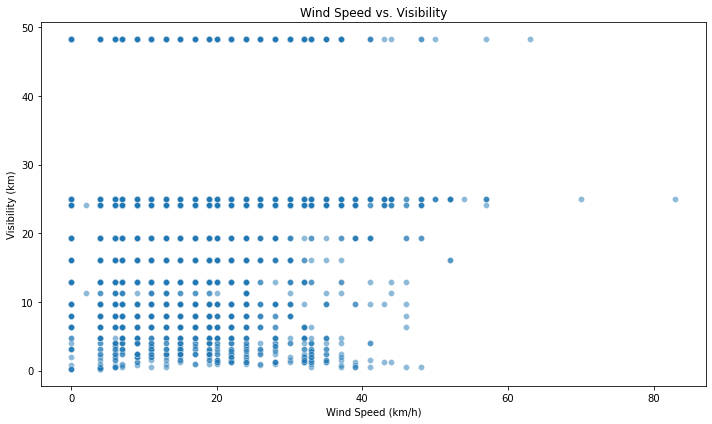

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind Speed_km/h', y='Visibility_km', alpha=0.5)
plt.title('Wind Speed vs. Visibility')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.tight_layout()
plt.show()

# Humedad

- La humedad es relativamente uniforme en el conjunto de datos. El hecho de que el 60% de los datos se concentre en un rango relativamente estrecho de valores indica que la humedad no varía mucho de un punto a otro.
- La humedad es alta en la mayoría de los casos. El hecho de que el 60% de los datos tenga una frecuencia de más de 800 indica que la humedad es alta en la mayoría de los casos.
- La humedad es baja en algunos casos. El hecho de que los valores mínimos y máximos sean relativamente bajos indica que la humedad es baja en algunos casos.

Específicamente, se podría concluir que la humedad promedio es de aproximadamente 800. También se podría concluir que la humedad es mayor del 80% en la mayoría de los casos, y menor del 40% en algunos casos.

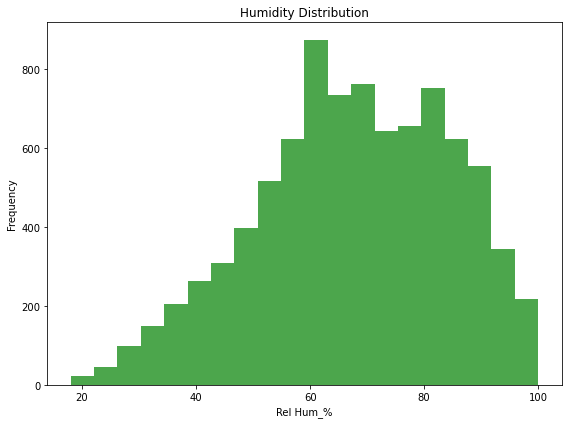

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rel Hum_%'], bins=20, color='green', alpha=0.7)
plt.xlabel('Rel Hum_%')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

# Modelo predictivo o clasificatorio 

In [30]:
median_wind_speed = df['Wind Speed_km/h'].loc[df['Wind Speed_km/h'] != 'Calm'].median()
df.loc[df['Wind Speed_km/h'] == 'Calm', 'Wind Speed_km/h'] = median_wind_speed
df['Wind Speed_km/h'] = df['Wind Speed_km/h'].astype(float)

X = df.drop(['Weather', 'Date/Time', 'Weather'], axis=1)
y = df['Weather']

In [31]:
scaler = StandardScaler()
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos

In [33]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [34]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [35]:
random_forest = RandomForestClassifier(random_state=42)

In [36]:
knn = KNeighborsClassifier()

In [37]:
svm = SVC()

In [38]:
naive_bayes = GaussianNB()

In [39]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [40]:
classifiers = [logistic_regression, decision_tree, random_forest, knn, svm, naive_bayes, gradient_boosting]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Gradient Boosting']

In [41]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

Logistic Regression Accuracy: 0.37677859988616963


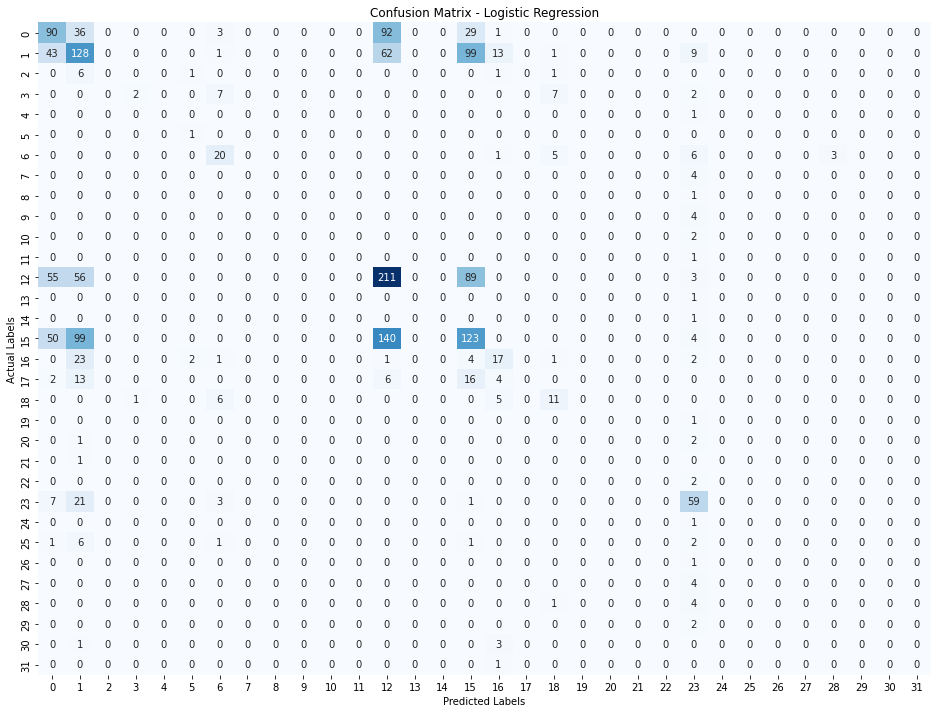

Decision Tree Accuracy: 0.4945930563460444


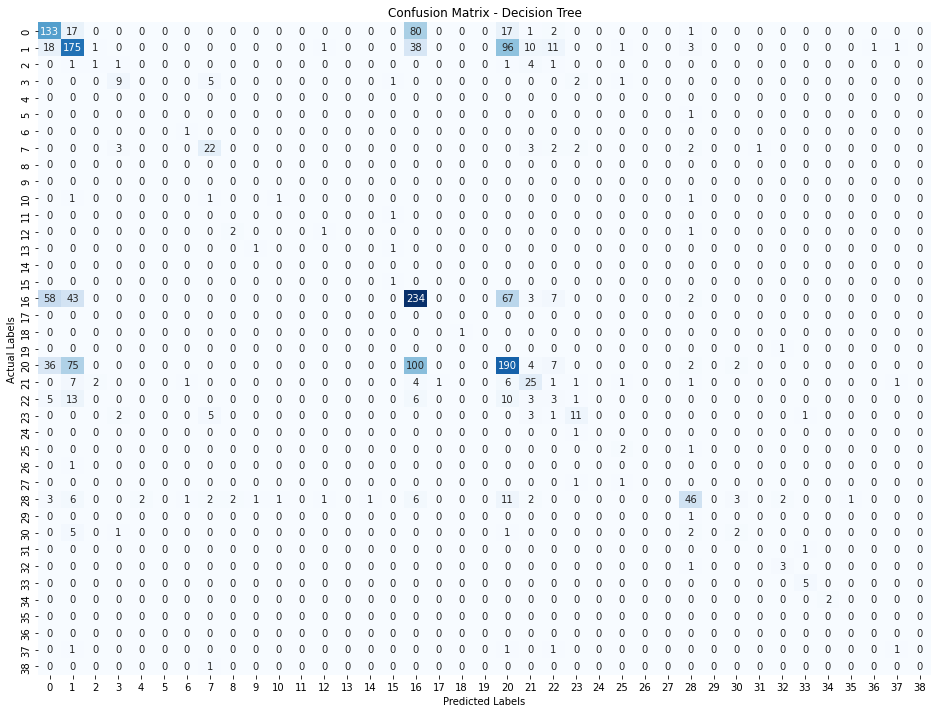

Random Forest Accuracy: 0.5771200910643142


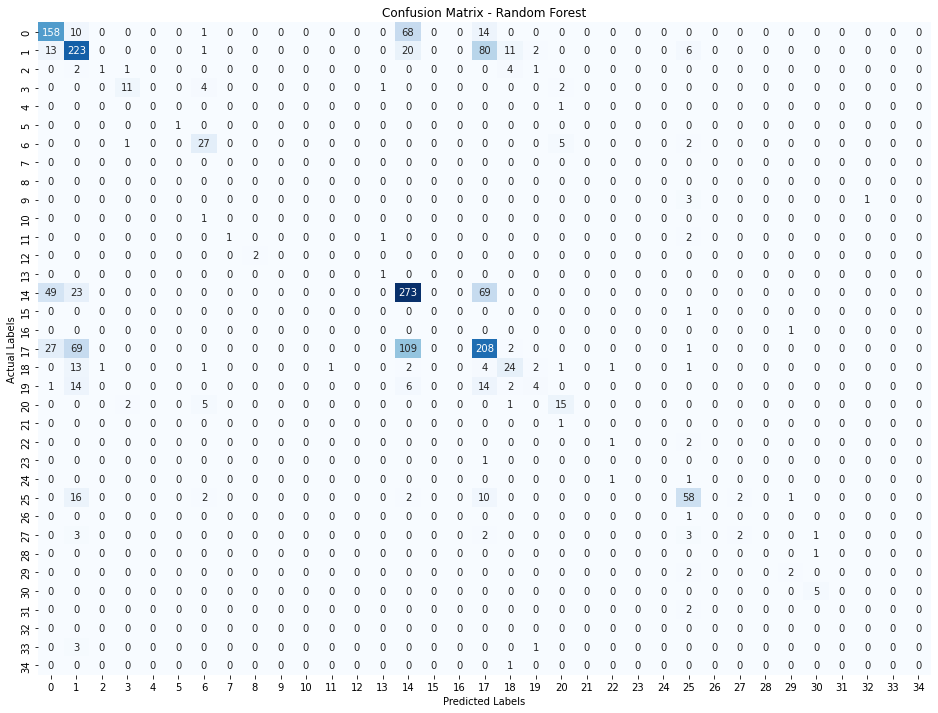

KNN Accuracy: 0.4877632327831531


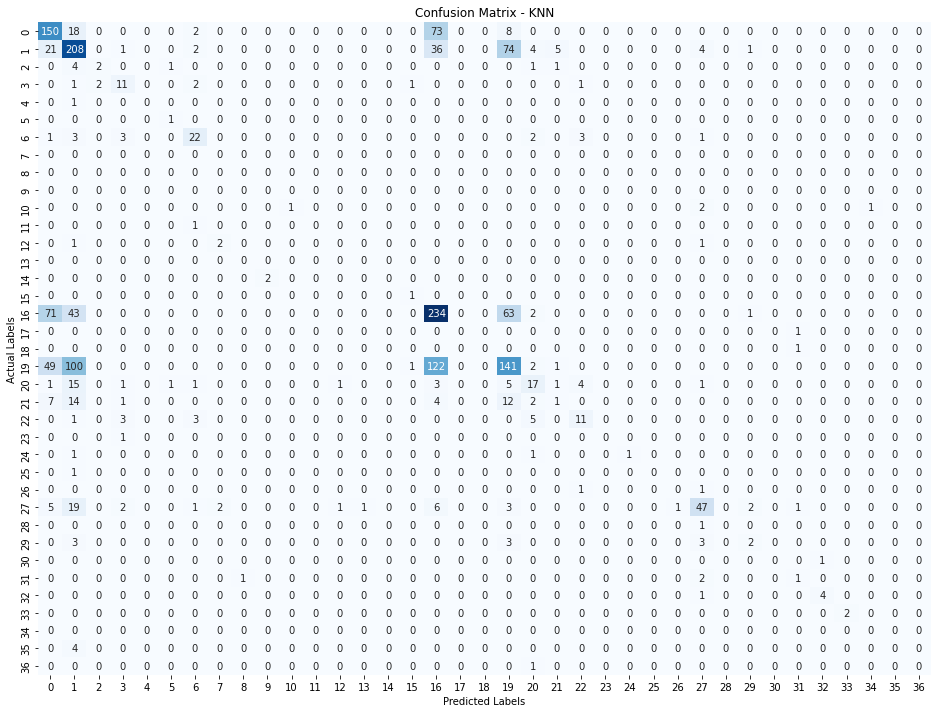

SVM Accuracy: 0.3995446784291406


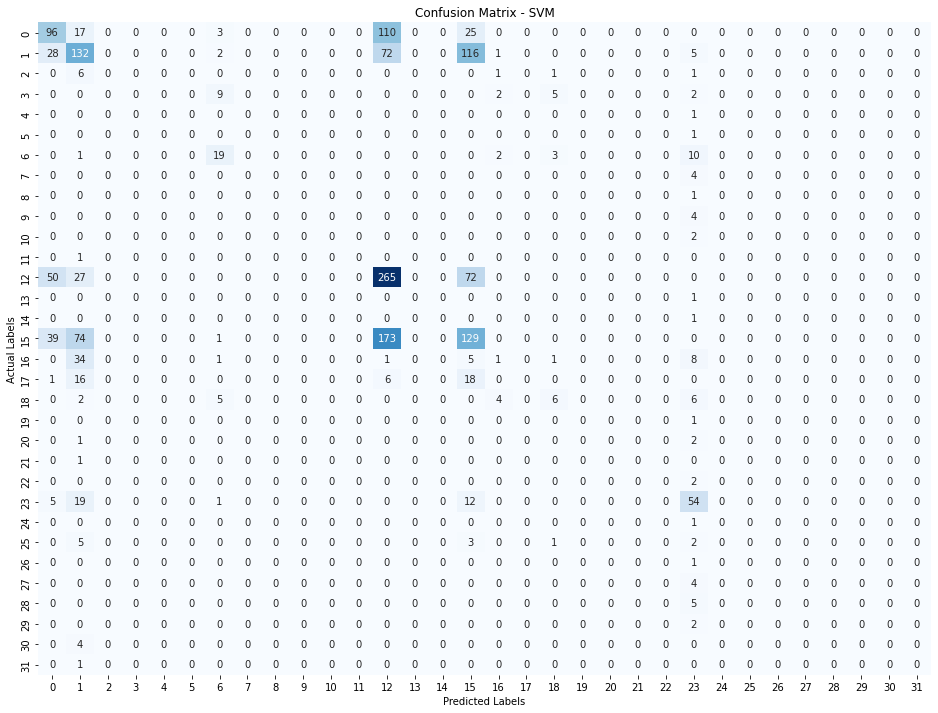

Naive Bayes Accuracy: 0.34319863403528744


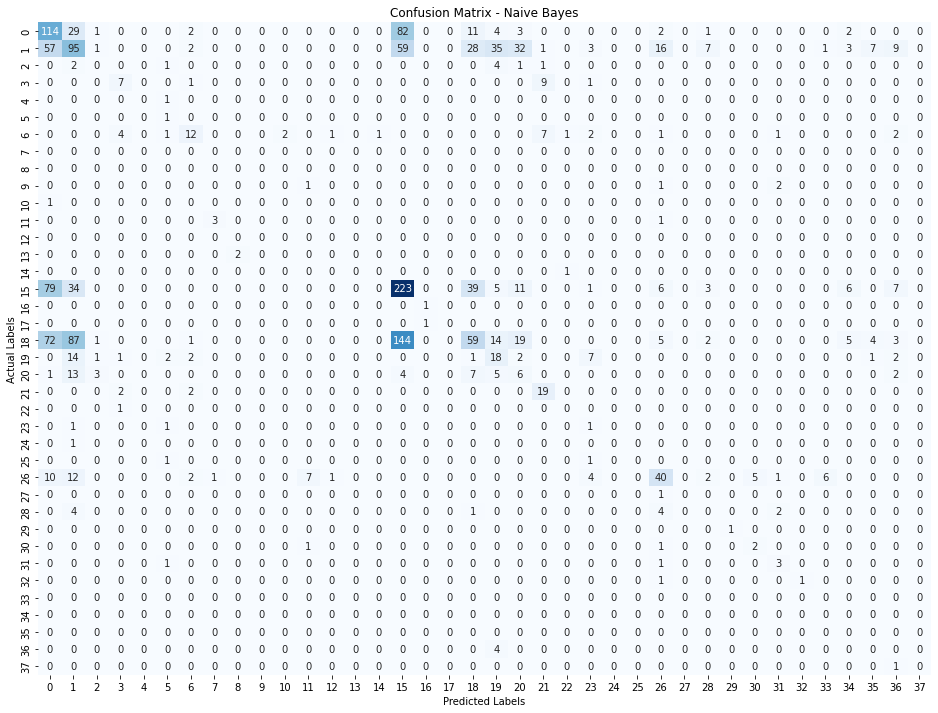

Gradient Boosting Accuracy: 0.4496300512236767


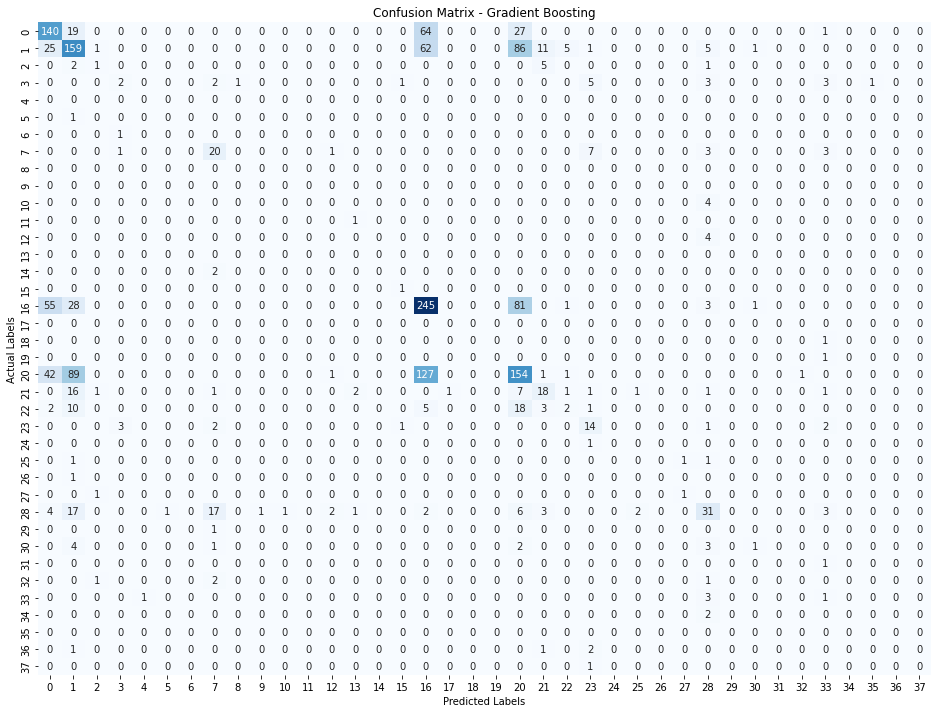

In [42]:
accuracy_scores = []
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    plot_confusion_matrix(y_test_labels, y_pred_labels, f'Confusion Matrix - {name}')

In [ ]:
accuracy_df = pd.DataFrame({'Algorithm': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Comparison of Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()